<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/gh-pages/Employee_Exit_Surveys_practice_cleaning_and_analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __Employee Exit Surveys__
#### Practice for Cleaning and Analyzing Datasets

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
exit_survey = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/dete-exit-survey-january-2014.csv',
                          usecols = ['ID','SeparationType','Cease Date','DETE Start Date','Employment Status','Position','Age','Gender'],
                          na_values='Not Stated')
exit_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 822 non-null    int64  
 1   SeparationType     822 non-null    object 
 2   Cease Date         788 non-null    object 
 3   DETE Start Date    749 non-null    float64
 4   Position           817 non-null    object 
 5   Employment Status  817 non-null    object 
 6   Gender             798 non-null    object 
 7   Age                811 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 51.5+ KB


In [ ]:
exit_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Position,Employment Status,Gender,Age
0,1,Ill Health Retirement,08/2012,1984,Public Servant,Permanent Full-time,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Public Servant,Permanent Full-time,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011,Schools Officer,Permanent Full-time,Male,61 or older


In [ ]:
# import tafe_survey using encoding cp1252

tafe_survey = pd.read_csv('http://opendata.dete.qld.gov.au/human-resources/tafe-employee-exit-survey-access-database-december-2013.csv', 
                          encoding = 'cp1252',
                          usecols=['Record ID','Reason for ceasing employment','LengthofServiceOverall. Overall Length of Service at Institute (in years)'])

tafe_survey.head(3)

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years)
0,634133009996094000,Contract Expired,1-2
1,634133654064531000,Retirement,NaN
2,634138845606563000,Retirement,NaN


In [ ]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   Record ID                                                                  702 non-null    int64 
 1   Reason for ceasing employment                                              701 non-null    object
 2   LengthofServiceOverall. Overall Length of Service at Institute (in years)  596 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.6+ KB


In [ ]:
# show the one row that has null value
tafe_survey[tafe_survey['Reason for ceasing employment'].isnull()]

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years)
324,634580449107031000,NaN,NaN


In [ ]:
# show all rows that have null values
tafe_survey[tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].isnull()]

,Record ID,Reason for ceasing employment,LengthofServiceOverall. Overall Length of Service at Institute (in years)
1,634133654064531000,Retirement,NaN
2,634138845606563000,Retirement,NaN
3,634139903350000000,Resignation,NaN
16,634177007457719000,Resignation,NaN
18,634177938010971000,Resignation,NaN
...,...,...,...
672,635013239645781000,Retirement,NaN
690,635049577295469000,Resignation,NaN
692,635059151164844000,Contract Expired,NaN
694,635065177031604000,Resignation,NaN


#### __Questions to Answer__

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
  - What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? 
 - What about older employees?



#### __Errors in dates found for 'Cease Date' and 'Start Date'__
Multiple date formats for 'Cease Date'.  'Not Stated' strings are found in both columns.  'Start Date' only has years for dates information.

In [ ]:
# Errors for 'Cease Date'
end_date = exit_survey['Cease Date']
end_date.value_counts().head(10).to_frame()

,Cease Date
2012,344
2013,200
01/2014,43
12/2013,40
09/2013,34
Not Stated,34
06/2013,27
07/2013,22
10/2013,20
11/2013,16


In [ ]:
# Errors for 'DETE Start Date'
start_date = exit_survey['DETE Start Date']
start_date.value_counts().head(10).to_frame()

,DETE Start Date
Not Stated,73
2011,40
2007,34
2008,31
2012,27
2010,27
2009,24
2006,23
1970,21
2013,21


In [ ]:
# New df.  dropped rows with 'Not Stated' as dates

exit_survey2 = exit_survey[exit_survey['DETE Start Date'] != 'Not Stated']
exit_survey2 = exit_survey2[exit_survey2['Cease Date'] != 'Not Stated']

exit_survey2['DETE Start Date'].value_counts()
exit_survey2['Cease Date'].value_counts().head().to_frame()


,Cease Date
2012,306
2013,183
01/2014,43
12/2013,34
09/2013,31


In [ ]:
# fix 'Cease Date' formating to show only years to match 'DETE Start Date'

# Keep only Year for columns with dates
exit_survey2['end_date'] = exit_survey2['Cease Date'].str[-4:].astype(int)
exit_survey2['start_date'] = exit_survey2['DETE Start Date'].astype(int)
exit_survey2['total_years'] = exit_survey2['end_date'] - exit_survey2['start_date']

exit_survey2[['start_date','end_date','total_years']].head()

,start_date,end_date,total_years
0,1984,2012,28
2,2011,2012,1
3,2005,2012,7
4,1970,2012,42
5,1994,2012,18


In [ ]:
# Establish time frame to determine characteristics for a new_employee

new_employees = exit_survey2[exit_survey2['total_years'] <= 1] 

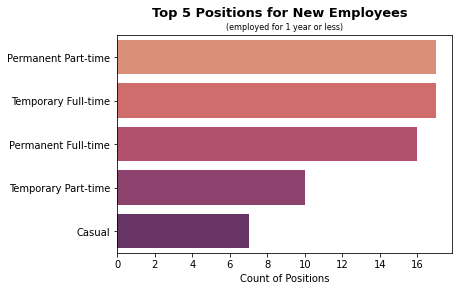

In [ ]:
sns.countplot(data=new_employees, y='Employment Status', order=new_employees['Employment Status'].value_counts().head().index, palette="flare")
plt.suptitle('''Top 5 Positions for New Employees''',fontsize=13,fontweight='bold')
plt.title('(employed for 1 year or less)',fontdict={'fontsize':8})
plt.ylabel('')
plt.xlabel('Count of Positions')
plt.show()

In [ ]:
new_employees.head()

,ID,SeparationType,Cease Date,DETE Start Date,Position,Employment Status,Gender,Age,end_date,start_date,total_years
2,3,Voluntary Early Retirement (VER),05/2012,2011,Schools Officer,Permanent Full-time,Male,61 or older,2012,2011,1
37,38,Resignation-Other reasons,2012,2011,Teacher Aide,Temporary Part-time,Female,21-25,2012,2011,1
42,43,Resignation-Move overseas/interstate,2012,2011,Cleaner,Permanent Part-time,Female,41-45,2012,2011,1
61,62,Resignation-Other reasons,2012,2011,Schools Officer,Temporary Part-time,Female,31-35,2012,2011,1
71,72,Resignation-Other reasons,2012,2011,Teacher Aide,Permanent Part-time,Female,36-40,2012,2011,1


In [ ]:
new_employees.Position.value_counts().head().to_frame(name='Top 5 Positions for New Employees')

,Top 5 Positions for New Employees
Public Servant,21
Teacher,14
Teacher Aide,12
Cleaner,8
School Administrative Staff,4


In [ ]:
temp_list = ['Temporary Full-time', 'Temporary Part-time']

new_temp = new_employees[new_employees['Employment Status'].isin(temp_list)]
print('\nTop 5 Positions for New Employees w/ Temp. Status\n')
new_temp.Position.value_counts().head().to_frame(name='Positions')


Top 5 Positions for New Employees w/ Temp. Status



,Positions
Public Servant,13
Teacher Aide,5
Teacher,3
School Administrative Staff,2
"School Based Professional Staff (Therapist, nurse, etc)",2


In [ ]:
# All positions with a start and end date
total_positions = exit_survey2.Position.value_counts().head(10)
total_positions.to_frame()

,Position
Teacher,288
Public Servant,117
Teacher Aide,114
Cleaner,81
Head of Curriculum/Head of Special Education,34
Schools Officer,18
School Administrative Staff,12
Guidance Officer,10
Technical Officer,9
Professional Officer,7


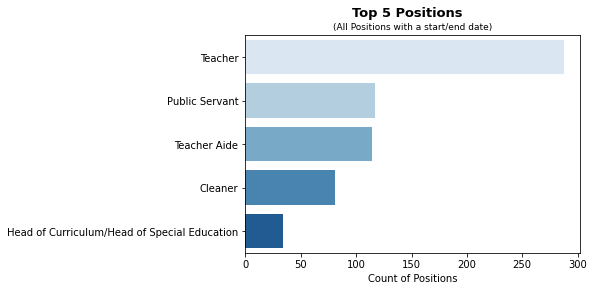

In [ ]:
# All positions with a start and end date
sns.countplot(data=exit_survey2, y='Position', order=exit_survey2.Position.value_counts().head().index, palette="Blues")
plt.suptitle('Top 5 Positions',fontsize=13,fontweight='bold')
plt.title("(All Positions with a start/end date)",fontdict={'fontsize':9})
plt.ylabel('')
plt.xlabel('Count of Positions')
plt.show()